In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split

In [165]:
data=pd.read_csv("Train.csv")

In [166]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [168]:
data["Embarked"].fillna("S",inplace=True)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
target=data["Survived"]
features=data.drop("Survived",axis=1)

In [183]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [162]:
k=features["Age"]

In [173]:
t=np.mean(k)

In [179]:
tm=features["Age"].fillna(value=t,axis=0,inplace=True)

In [184]:
features.drop("Cabin",axis=1,inplace=True)

In [185]:
len(features.PassengerId.unique())

891

In [186]:
uniq={}

for i in features.columns:
    uniq[i]=len(features[i].unique())

In [187]:
uniq

{'PassengerId': 891,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 89,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Embarked': 3}

#### Passenger ID & Name have 418 unique value that it increases variance of model

In [188]:
features.drop(["PassengerId","Name"],axis=1,inplace=True)

In [189]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [24]:
lr=LogisticRegression()

In [190]:
features["relative"]=features["SibSp"]+features["Parch"]

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
def alone(x):
    if(x>0):
        return 0
    else:
        return 1

In [193]:
features["Travelling Alone"]=features["relative"].apply(alone)

In [194]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Sex               891 non-null    object 
 2   Age               891 non-null    float64
 3   SibSp             891 non-null    int64  
 4   Parch             891 non-null    int64  
 5   Ticket            891 non-null    object 
 6   Fare              891 non-null    float64
 7   Embarked          891 non-null    object 
 8   relative          891 non-null    int64  
 9   Travelling Alone  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [195]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Travelling Alone  891 non-null    int64  
 1   Embarked_C        891 non-null    uint8  
 2   Embarked_Q        891 non-null    uint8  
 3   Embarked_S        891 non-null    uint8  
 4   Pclass_1          891 non-null    uint8  
 5   Pclass_2          891 non-null    uint8  
 6   Pclass_3          891 non-null    uint8  
 7   Age               891 non-null    float64
 8   Fare              891 non-null    float64
 9   relative          891 non-null    float64
 10  Sex_2             891 non-null    int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 40.2 KB


In [196]:
import seaborn as sns

C:\Users\swata\anaconda3\envs\alpha\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


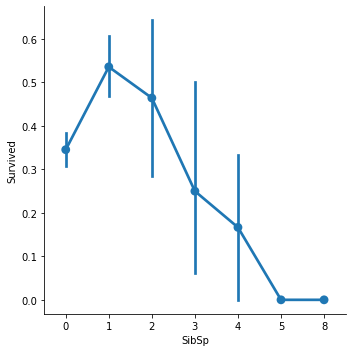

In [197]:
sns.factorplot(x="SibSp",y="Survived",data=data)

C:\Users\swata\anaconda3\envs\alpha\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


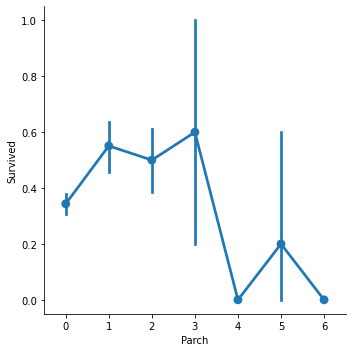

In [198]:
sns.factorplot(x="Parch",y="Survived",data=data)

C:\Users\swata\anaconda3\envs\alpha\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


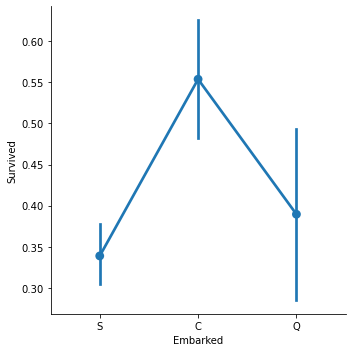

In [199]:
sns.factorplot(x="Embarked",y="Survived",data=data)

In [200]:
from sklearn.preprocessing import OneHotEncoder

In [201]:
tyu=OneHotEncoder()

In [205]:
X=features.copy()

In [206]:
X=pd.get_dummies(X,columns=["Embarked"])

In [207]:
XY=pd.get_dummies(X,columns=["Pclass"])

In [208]:
XY.drop(["SibSp","Parch"],inplace=True,axis=1)

In [209]:
X.drop("Ticket",inplace=True,axis=1)

In [210]:
X.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [211]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               891 non-null    object 
 1   Age               891 non-null    float64
 2   Ticket            891 non-null    object 
 3   Fare              891 non-null    float64
 4   relative          891 non-null    int64  
 5   Travelling Alone  891 non-null    int64  
 6   Embarked_C        891 non-null    uint8  
 7   Embarked_Q        891 non-null    uint8  
 8   Embarked_S        891 non-null    uint8  
 9   Pclass_1          891 non-null    uint8  
 10  Pclass_2          891 non-null    uint8  
 11  Pclass_3          891 non-null    uint8  
dtypes: float64(2), int64(2), object(2), uint8(6)
memory usage: 47.1+ KB


In [212]:
ss_data=["Age","Fare","relative"]

In [213]:
feta=XY[ss_data]

In [214]:
scaler=StandardScaler()
ty=scaler.fit_transform(feta)

In [215]:
scaled_features = pd.DataFrame(ty, columns = ss_data)

In [216]:
rem=XY.drop(["Age","Fare","relative"],axis=1)

In [217]:
rem["Age"]=scaled_features["Age"]
rem["Fare"]=scaled_features["Fare"]
rem["relative"]=scaled_features["relative"]

In [218]:
X=rem.copy()
age={"male":1,"female":0}

X["Sex_2"]=X["Sex"].map(age)
#X.drop("Sex",axis=1,inplace=True)

In [222]:
X.drop("Sex",axis=1,inplace=True)

In [223]:
X.drop("Ticket",axis=1,inplace=True)

In [245]:
lr.fit(X,target)

LogisticRegression()

In [251]:
tit=pd.read_csv("titanic.csv")

In [268]:
test=tit.drop("Survived",axis=1)
result=tit["Survived"]

In [253]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [269]:
test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [270]:
k=test["Age"]
men=np.mean(k)
zxx=test["Age"].fillna(value=men,axis=0)

In [261]:
k=test["Age"]
np.mean(k)

30.272590361445815

In [276]:
test["Age"]=zxx

In [302]:
(test["Age"]==men).value_counts()

False    332
True      86
Name: Age, dtype: int64

In [304]:
test.Age.value_counts()

30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: Age, Length: 80, dtype: int64

In [280]:
k=test["Fare"]
my=np.mean(k)
zxx=test["Fare"].fillna(value=my,axis=0)

In [233]:
test.drop(["Cabin"],axis=1,inplace=True)

In [281]:
test["Fare"]=zxx

False    417
True       1
Name: Fare, dtype: int64

In [283]:
test["relative"]=test["SibSp"]+test["Parch"]
def alone(x):
    if(x>0):
        return 0
    else:
        return 1
test["Travelling Alone"]=test["relative"].apply(alone)

In [284]:
test.drop(["SibSp","Parch"],axis=1,inplace=True)

In [285]:
X_2=test.copy()
age={"male":1,"female":0}

X_2["Sex_2"]=X_2["Sex"].map(age)
X_2.drop("Sex",axis=1,inplace=True)

30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: Age, Length: 80, dtype: int64

In [286]:
X_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Age               418 non-null    float64
 2   Fare              418 non-null    float64
 3   Embarked          418 non-null    object 
 4   relative          418 non-null    int64  
 5   Travelling Alone  418 non-null    int64  
 6   Sex_2             418 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [287]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Travelling Alone  891 non-null    int64  
 1   Embarked_C        891 non-null    uint8  
 2   Embarked_Q        891 non-null    uint8  
 3   Embarked_S        891 non-null    uint8  
 4   Pclass_1          891 non-null    uint8  
 5   Pclass_2          891 non-null    uint8  
 6   Pclass_3          891 non-null    uint8  
 7   Age               891 non-null    float64
 8   Fare              891 non-null    float64
 9   relative          891 non-null    float64
 10  Sex_2             891 non-null    int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 40.2 KB


In [288]:
X_2=pd.get_dummies(X_2,columns=["Embarked"])
X_2=pd.get_dummies(X_2,columns=["Pclass"])

In [289]:
ss_data=["Age","Fare","relative"]
feta=X_2[ss_data]
ty=scaler.fit_transform(feta)
scaled_features_test = pd.DataFrame(ty, columns = ss_data)

In [290]:
rem=X_2.drop(["Age","Fare","relative"],axis=1)
rem["Age"]=scaled_features_test["Age"]
rem["Fare"]=scaled_features_test["Fare"]
rem["relative"]=scaled_features_test["relative"]

In [291]:
rem.describe()

,Travelling Alone,Sex_2,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age,Fare,relative
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,4.180000e+02,4.180000e+02,4.180000e+02
mean,0.605263,0.636364,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531,1.328018e-17,-2.808758e-17,-6.374486e-17
std,0.489380,0.481622,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135,1.001198e+00,1.001198e+00,1.001198e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.385419e+00,-6.387815e-01,-5.534426e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.763018e-01,-4.972129e-01,-5.534426e-01
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,-3.796234e-01,-5.534426e-01
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.340463e-01,-7.399887e-02,1.056429e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.623577e+00,8.547081e+00,6.037412e+00


In [294]:
rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Travelling Alone  418 non-null    int64  
 1   Sex_2             418 non-null    int64  
 2   Embarked_C        418 non-null    uint8  
 3   Embarked_Q        418 non-null    uint8  
 4   Embarked_S        418 non-null    uint8  
 5   Pclass_1          418 non-null    uint8  
 6   Pclass_2          418 non-null    uint8  
 7   Pclass_3          418 non-null    uint8  
 8   Age               418 non-null    float64
 9   Fare              418 non-null    float64
 10  relative          418 non-null    float64
dtypes: float64(3), int64(2), uint8(6)
memory usage: 18.9 KB


In [295]:
rem=rem.iloc[:,[0,2,3,4,5,6,7,8,9,10,1]]

In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Travelling Alone  891 non-null    int64  
 1   Embarked_C        891 non-null    uint8  
 2   Embarked_Q        891 non-null    uint8  
 3   Embarked_S        891 non-null    uint8  
 4   Pclass_1          891 non-null    uint8  
 5   Pclass_2          891 non-null    uint8  
 6   Pclass_3          891 non-null    uint8  
 7   Age               891 non-null    float64
 8   Fare              891 non-null    float64
 9   relative          891 non-null    float64
 10  Sex_2             891 non-null    int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 40.2 KB


In [296]:
pred_lr=lr.predict(rem)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_record=[]

In [297]:
print(accuracy_score(result,pred_lr))

0.937799043062201


### Storing train and test dataset after all preprocessing 

In [298]:

Final_test_data=rem.copy()

In [299]:
Final_test_data["Survived"]=result

In [300]:

Final_test_data.to_csv("Final_test_data.csv",index=False)

In [225]:
Final_train_data=X.copy()
Final_train_data["Survived"]=target
Final_train_data.to_csv("Final_train_data.csv",index=False)
